In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import scienceplots
plt.style.use(['science'])

In [60]:
dT = 0.1
dL = 1
T = 400
L = 2048
NT = int(T/dT)
NL = int(L/dL)


# $$dS_i^x = dt \times (S_i^y (S_{i-1}^z + S_{i+1}^z) - S_i^z (S_{i-1}^y + S_{i+1}^y))$$
# $$dS_i^y = dt \times (S_i^z (S_{i-1}^x + S_{i+1}^x) - S_i^x (S_{i-1}^z + S_{i+1}^z))$$
# $$dS_i^z = dt \times (S_i^x (S_{i-1}^y + S_{i+1}^y) - S_i^y (S_{i-1}^x + S_{i+1}^x))$$



In [61]:
def evolve(sx, sy, sz, NT, J1, J2):
    
    for ti in range(NT-1):
        
        ti = ti + 1
        
        s_iminus1_z = np.roll(sz[ti-1], 1)
        s_iplus1_z = np.roll(sz[ti-1], -1)
        s_iminus1_y = np.roll(sy[ti-1], 1)
        s_iplus1_y = np.roll(sy[ti-1], -1)
        s_iminus1_x = np.roll(sx[ti-1], 1)
        s_iplus1_x = np.roll(sx[ti-1], -1)
        
        s_iminus2_z = np.roll(sz[ti-1], 2)
        s_iplus2_z = np.roll(sz[ti-1], -2)
        s_iminus2_y = np.roll(sy[ti-1], 2)
        s_iplus2_y = np.roll(sy[ti-1], -2)
        s_iminus2_x = np.roll(sx[ti-1], 2)
        s_iplus2_x = np.roll(sx[ti-1], -2)
       
        k1x = ( J1 * dT * (sy[ti-1] * (s_iminus1_z + s_iplus1_z) - sz[ti-1] * (s_iminus1_y + s_iplus1_y)) + 
               J2 * dT * (sy[ti-1] * (s_iminus2_z + s_iplus2_z) - sz[ti-1] * (s_iminus2_y + s_iplus2_y)) )
        
        k1y = ( J1 * dT * (sz[ti-1] * (s_iminus1_x + s_iplus1_x) - sx[ti-1] * (s_iminus1_z + s_iplus1_z)) + 
              J2 * dT * (sz[ti-1] * (s_iminus2_x + s_iplus2_x) - sx[ti-1] * (s_iminus2_z + s_iplus2_z)))
        
        k1z = ( J1 * dT * (sx[ti-1] * (s_iminus1_y + s_iplus1_y) - sy[ti-1] * (s_iminus1_x + s_iplus1_x)) + 
              J2 * dT * (sx[ti-1] * (s_iminus2_y + s_iplus2_y) - sy[ti-1] * (s_iminus2_x + s_iplus2_x)))
    
        s_temp_x = sx[ti-1] + 0.5 * k1x
        s_temp_y = sy[ti-1] + 0.5 * k1y
        s_temp_z = sz[ti-1] + 0.5 * k1z
        
        s_iminus1_z = np.roll(s_temp_z, 1)
        s_iplus1_z = np.roll(s_temp_z, -1)
        s_iminus1_y = np.roll(s_temp_y, 1)
        s_iplus1_y = np.roll(s_temp_y, -1)
        s_iminus1_x = np.roll(s_temp_x, 1)
        s_iplus1_x = np.roll(s_temp_x, -1)
        
        s_iminus2_z = np.roll(s_temp_z, 2)
        s_iplus2_z = np.roll(s_temp_z, -2)
        s_iminus2_y = np.roll(s_temp_y, 2)
        s_iplus2_y = np.roll(s_temp_y, -2)
        s_iminus2_x = np.roll(s_temp_x, 2)
        s_iplus2_x = np.roll(s_temp_x, -2)
       
        k2x = ( J1 * dT * (s_temp_y * (s_iminus1_z + s_iplus1_z) - s_temp_z * (s_iminus1_y + s_iplus1_y)) + 
              J2 * dT * (s_temp_y * (s_iminus2_z + s_iplus2_z) - s_temp_z * (s_iminus2_y + s_iplus2_y)))
        
        k2y = ( J1 * dT * (s_temp_z * (s_iminus1_x + s_iplus1_x) - s_temp_x * (s_iminus1_z + s_iplus1_z)) + 
              J2 * dT * (s_temp_z * (s_iminus2_x + s_iplus2_x) - s_temp_x * (s_iminus2_z + s_iplus2_z)))
        
        k2z = ( J1 * dT * (s_temp_x * (s_iminus1_y + s_iplus1_y) - s_temp_y * (s_iminus1_x + s_iplus1_x)) + 
              J2 * dT * (s_temp_x * (s_iminus2_y + s_iplus2_y) - s_temp_y * (s_iminus2_x + s_iplus2_x)))
        
    
        s_temp_x = sx[ti-1] + 0.5 * k2x
        s_temp_y = sy[ti-1] + 0.5 * k2y
        s_temp_z = sz[ti-1] + 0.5 * k2z
        
        s_iminus1_z = np.roll(s_temp_z, 1)
        s_iplus1_z = np.roll(s_temp_z, -1)
        s_iminus1_y = np.roll(s_temp_y, 1)
        s_iplus1_y = np.roll(s_temp_y, -1)
        s_iminus1_x = np.roll(s_temp_x, 1)
        s_iplus1_x = np.roll(s_temp_x, -1)
        
        s_iminus2_z = np.roll(s_temp_z, 2)
        s_iplus2_z = np.roll(s_temp_z, -2)
        s_iminus2_y = np.roll(s_temp_y, 2)
        s_iplus2_y = np.roll(s_temp_y, -2)
        s_iminus2_x = np.roll(s_temp_x, 2)
        s_iplus2_x = np.roll(s_temp_x, -2)
       
        k3x = ( J1 * dT * (s_temp_y * (s_iminus1_z + s_iplus1_z) - s_temp_z * (s_iminus1_y + s_iplus1_y)) + 
              J2 * dT * (s_temp_y * (s_iminus2_z + s_iplus2_z) - s_temp_z * (s_iminus2_y + s_iplus2_y)))
        
        k3y = ( J1 * dT * (s_temp_z * (s_iminus1_x + s_iplus1_x) - s_temp_x * (s_iminus1_z + s_iplus1_z)) + 
              J2 * dT * (s_temp_z * (s_iminus2_x + s_iplus2_x) - s_temp_x * (s_iminus2_z + s_iplus2_z)))
        
        k3z = ( J1 * dT * (s_temp_x * (s_iminus1_y + s_iplus1_y) - s_temp_y * (s_iminus1_x + s_iplus1_x)) + 
              J2 * dT * (s_temp_x * (s_iminus2_y + s_iplus2_y) - s_temp_y * (s_iminus2_x + s_iplus2_x)))
        
    
        s_temp_x = sx[ti-1] + k3x
        s_temp_y = sy[ti-1] + k3y
        s_temp_z = sz[ti-1] + k3z
        
        s_iminus1_z = np.roll(s_temp_z, 1)
        s_iplus1_z = np.roll(s_temp_z, -1)
        s_iminus1_y = np.roll(s_temp_y, 1)
        s_iplus1_y = np.roll(s_temp_y, -1)
        s_iminus1_x = np.roll(s_temp_x, 1)
        s_iplus1_x = np.roll(s_temp_x, -1)
        
        s_iminus2_z = np.roll(s_temp_z, 2)
        s_iplus2_z = np.roll(s_temp_z, -2)
        s_iminus2_y = np.roll(s_temp_y, 2)
        s_iplus2_y = np.roll(s_temp_y, -2)
        s_iminus2_x = np.roll(s_temp_x, 2)
        s_iplus2_x = np.roll(s_temp_x, -2)
       
        k4x = ( J1 * dT * (s_temp_y * (s_iminus1_z + s_iplus1_z) - s_temp_z * (s_iminus1_y + s_iplus1_y)) + 
              J2 * dT * (s_temp_y * (s_iminus2_z + s_iplus2_z) - s_temp_z * (s_iminus2_y + s_iplus2_y)))
        
        k4y = ( J1 * dT * (s_temp_z * (s_iminus1_x + s_iplus1_x) - s_temp_x * (s_iminus1_z + s_iplus1_z)) + 
              J2 * dT * (s_temp_z * (s_iminus2_x + s_iplus2_x) - s_temp_x * (s_iminus2_z + s_iplus2_z)))
        
        k4z = ( J1 * dT * (s_temp_x * (s_iminus1_y + s_iplus1_y) - s_temp_y * (s_iminus1_x + s_iplus1_x)) + 
              J2 * dT * (s_temp_x * (s_iminus2_y + s_iplus2_y) - s_temp_y * (s_iminus2_x + s_iplus2_x)))
    
        sx[ti] = sx[ti-1] + (1/6) * (k1x + 2*k2x + 2*k3x + k4x)
        sy[ti] = sy[ti-1] + (1/6) * (k1y + 2*k2y + 2*k3y + k4y)
        sz[ti] = sz[ti-1] + (1/6) * (k1z + 2*k2z + 2*k3z + k4z)
        
    return sx, sy, sz

In [63]:
N = 1
d = np.zeros((NT, NL))

J1 = 1
J2 = 2

for i in tqdm(range(N)):
    
    theta = np.random.uniform(0, 2*np.pi, (NT, NL))
    phi = np.random.uniform(0, 2*np.pi, (NT, NL))
    
    theta = np.array(theta, dtype=np.float32)
    phi = np.array(theta, dtype=np.float32)
    
    theta_prime = theta.copy()
    phi_prime = phi.copy()
    
    theta_prime[0, NL//2] += np.random.uniform(0, 1e-3, 1)
    
    Sx = np.sin(theta)*np.cos(phi)
    Sy = np.sin(theta)*np.sin(phi)
    Sz = np.cos(theta)
    
    Sx_prime = np.sin(theta_prime)*np.cos(phi_prime)
    Sy_prime = np.sin(theta_prime)*np.sin(phi_prime)
    Sz_prime = np.cos(theta_prime)
    
    x, y, z = evolve(Sx, Sy, Sz, NT, J1, J2)
    x_p, y_p, z_p = evolve(Sx_prime, Sy_prime, Sz_prime, NT, J1, J2)
    
    d += (0.5*(1 - x*x_p - y*y_p - z*z_p))/N
    
np.savetxt(f'N_{N}_J1_{J1}_J2_{J2}.txt', d)

100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.61s/it]


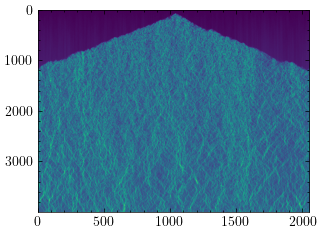

In [65]:
arr = np.loadtxt('N_1_J1_1_J2_2.txt')
plt.imshow(arr, aspect='auto')